# バンディット問題（Bandit Problem）

In [2]:
import numpy as np

class Bandit:
    def __init__(self, arms = 10):
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0
        
        

In [3]:
np.random.rand(10)

array([0.52962408, 0.15157899, 0.49758615, 0.71168429, 0.54209176,
       0.08635313, 0.42006157, 0.00608584, 0.0451519 , 0.26532821])

In [4]:
bandit = Bandit()
Q = 0

for n in range(1, 11):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    print(Q)


0.0
0.0
0.3333333333333333
0.25
0.4
0.5
0.5714285714285714
0.5
0.5555555555555556
0.5


### 大数の法則を確認

In [5]:
bandit = Bandit()
print(bandit.rates)

[0.59538284 0.83823163 0.85712953 0.80824265 0.18717209 0.96389761
 0.27075574 0.18597648 0.35688694 0.23731181]


In [6]:
Q = 0

for n in range(1, 100001):
    reward = bandit.play(0)
    Q += (reward - Q) / n
    if n == 100:
        print("100 : ",Q)
    if n == 1000:
        print("1000 : ",Q)
    if n == 10000:
        print("10000 : ",Q)
    
print(Q)

100 :  0.5899999999999996
1000 :  0.6040000000000003
10000 :  0.5925999999999995
0.5940099999999977


大数の法則を確認できた．

In [7]:
bandit = Bandit()

Qs = np.zeros(10)
ns = np.zeros(10)

for n in range(10):
    action = np.random.randint(0, 10)
    reward = bandit.play(action)

    ns[action] += 1
    Qs[action] += (reward - Qs[action]) / ns[action]
    print(Qs)

    

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.  0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
[1.         0.         0.         0.         0.66666667 0.
 0.         0.         0.         0.        ]
[1.         0.         0.         0.         0.66666667 0.
 0.         0.         0.         0.        ]
[1.         0.         0.         0.         0.66666667 0.
 0.         0.         0.         0.        ]
[1.         0.         0.         0.         0.66666667 0.
 0.         0.         0.         0.        ]


In [8]:
ns

array([2., 1., 0., 1., 3., 0., 0., 0., 1., 2.])

## 1回のみのBandit問題

In [9]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        # epsilonの値以下の場合，範囲内からどれかを選ぶ
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        # Qsの中で一番大きいのを選ぶ
        return np.argmax(self.Qs)


772


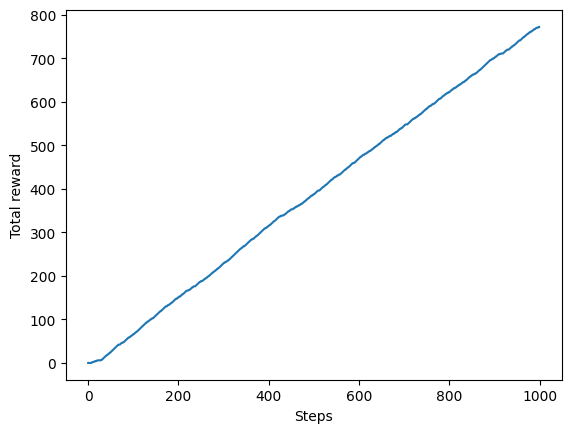

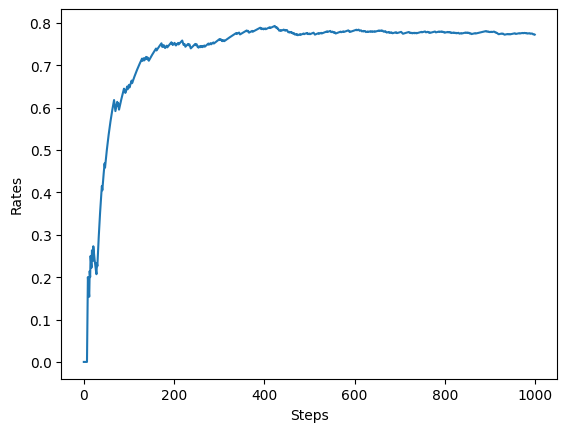

In [11]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    
    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1))

print(total_reward)

# グラフの描画(1)
plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

# グラフの描画(2)
plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

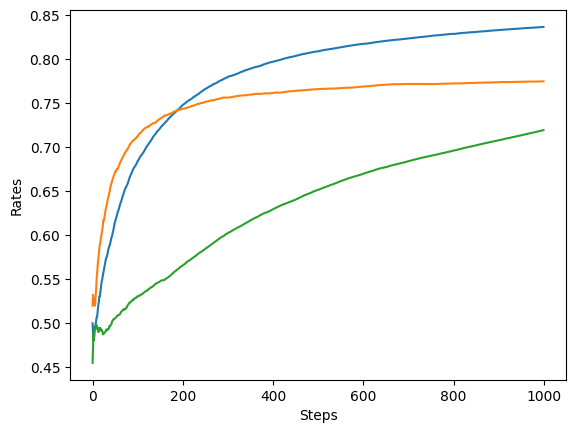

In [15]:
import matplotlib.pyplot as plt

for epsilon in [0.1, 0.3, 0.01]:
    runs = 200
    steps = 1000
    # epsilon = 0.1
    all_rates = np.zeros((runs, steps))

    for run in range(runs):
        bandit = Bandit()
        agent = Agent(epsilon)
        total_reward = 0
        total_rewards = []
        rates = []

        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            
            total_rewards.append(total_reward)
            rates.append(total_reward / (step+1))
        
        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0)

    # グラフの描画
    plt.ylabel('Rates')
    plt.xlabel('Steps')
    plt.plot(avg_rates)
plt.show()

ここまでが最初の条件が続く問題，ここからは
# 非定常問題

In [ ]:
class NonStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms)
        if rate > np.random.rand():
            return 1
        else:
            return 0